In [1]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
adata=sc.read('../LTNN/data/Bone-ltnn.h5ad',compression='gzip')
adata

AnnData object with n_obs × n_vars = 5275 × 3000
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'T_fwd_params', 'clusters_colors', 'clusters_sizes', 'diffmap_evals', 'hvg', 'iroot', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'paga_graph', 'palantir_branch_probs_cell_types', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'MAGIC_imputed_data', 'T_fwd_mde', 'X_diffmap', 'X_lsi', 'X_mde', 'X_tsne', 'X_umap', 'palantir_branch_probs', 'scaled|o

In [50]:
import scvelo as scv
scv.tl.paga(adata1, groups='clusters',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


/mnt/home/zehuazeng/miniconda3/envs/omicverse/lib/python3.8/site-packages/networkx/convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


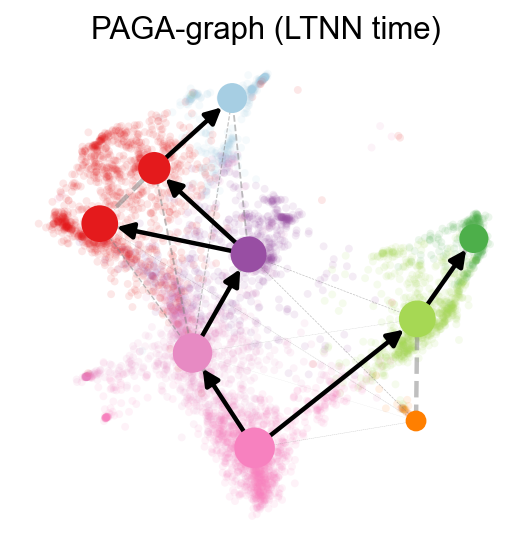

In [51]:
import scvelo as scv
ax=scv.pl.paga(adata1, basis='mde', size=50, alpha=.1,title='PAGA-graph (LTNN_time)',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

In [3]:
adata.uns['log1p']['base']=None

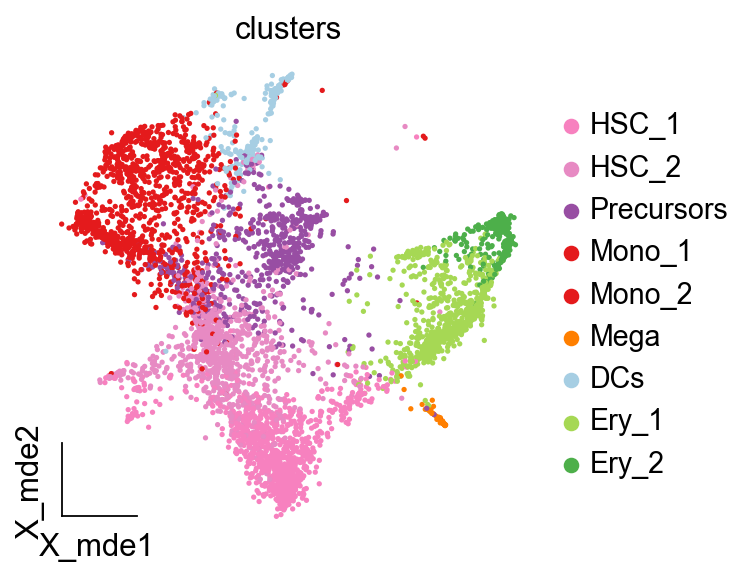

In [9]:
ov.utils.embedding(adata,basis='X_mde', color=['clusters'], 
               cmap='PuRd',legend_loc='right margin',frameon='small')

## panlantir

In [10]:
Traj=ov.single.TrajInfer(adata,basis='X_mde',groupby='clusters',
                         use_rep='scaled|original|X_pca',n_comps=50)
Traj.set_origin_cells('HSC_1')
Traj.set_terminal_cells(["Ery_2","Mono_2","DCs"])

In [11]:
Traj.inference(method='palantir',num_waypoints=500)
adata

Time for shortest paths: 0.20903095801671345 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9968
Correlation at iteration 2: 0.9998
Correlation at iteration 3: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


AnnData object with n_obs × n_vars = 5275 × 3000
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name', 'palantir_entropy'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'T_fwd_params', 'clusters_colors', 'clusters_sizes', 'diffmap_evals', 'hvg', 'iroot', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'paga_graph', 'palantir_branch_probs_cell_types', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap', 'DM_EigenValues', 'rank_genes_groups', 'clusters_cosg', 'palantir_waypoints'
    obsm: 'MAGIC_imputed_data', 

## scvelo

In [13]:
import scvelo as scv
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Global seed set to 0


Normalized count data: spliced, unspliced.
computing PCA
    with n_comps=30
    finished (0:00:00)
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [14]:
scv.tl.recover_dynamics(adata,n_jobs=8)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

    finished (0:01:23) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/5275 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [15]:
scv.tl.latent_time(adata)
adata.obs['latent_time_scvelo']=adata.obs['latent_time'].copy()

computing terminal states
    identified 3 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [16]:
adata.obs['velocity_pseudotime_scvelo']=adata.obs['velocity_pseudotime'].copy()

## VeloVI

In [17]:
from tqdm import tqdm
from multiprocessing import Lock
tqdm.set_lock(Lock())  # manually set internal lock

tqdm.write("test")

test


In [19]:
#adata = preprocess_data(adata)
from velovi import VELOVI
VELOVI.setup_anndata(adata, spliced_layer="Ms", unspliced_layer="Mu")
vae = VELOVI(adata)
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 363/500:  73%|███████▎  | 363/500 [02:30<00:56,  2.42it/s, loss=-2.24e+04, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -21043.875. Signaling Trainer to stop.


In [20]:
import torch
def add_velovi_outputs_to_adata(adata, vae):
    latent_time = vae.get_latent_time(n_samples=25)
    velocities = vae.get_velocity(n_samples=25, velo_statistic="mean")

    t = latent_time
    scaling = 20 / t.max(0)

    adata.layers["velocity"] = velocities / scaling
    adata.layers["latent_time_velovi"] = latent_time

    adata.var["fit_alpha"] = vae.get_rates()["alpha"] / scaling
    adata.var["fit_beta"] = vae.get_rates()["beta"] / scaling
    adata.var["fit_gamma"] = vae.get_rates()["gamma"] / scaling
    
    adata.var["fit_t_"] = (
        torch.nn.functional.softplus(vae.module.switch_time_unconstr)
        .detach()
        .cpu()
        .numpy()
    ) * scaling
    adata.layers["fit_t"] = latent_time.values * scaling[np.newaxis, :]
    adata.var['fit_scaling'] = 1.0

add_velovi_outputs_to_adata(adata, vae)
scv.tl.velocity_graph(adata)
scv.tl.latent_time(adata)
adata.obs['latent_time_velovi']=adata.obs['latent_time'].copy()

computing velocity graph (using 1/12 cores)


  0%|          | 0/5275 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [21]:
adata.obs['velocity_pseudotime_velovi']=adata.obs['velocity_pseudotime'].copy()

## pvVIA

In [22]:
v0 = ov.single.pyVIA(adata=adata,adata_key='scaled|original|X_pca',
                     adata_ncomps=80, basis='X_mde',
                         clusters='clusters',knn=30,random_seed=4,)

v0.run()

2024-03-24 03:09:16.503511	Running VIA over input data of 5275 (samples) x 50 (features)
2024-03-24 03:09:16.503570	Knngraph has 30 neighbors
2024-03-24 03:09:18.592303	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 45.3 % of edges. 
2024-03-24 03:09:18.610478	Number of connected components used for clustergraph  is 1
2024-03-24 03:09:18.798626	Commencing community detection
2024-03-24 03:09:19.178340	Finished running Leiden algorithm. Found 239 clusters.
2024-03-24 03:09:19.179944	Merging 220 very small clusters (<10)
2024-03-24 03:09:19.183671	Finished detecting communities. Found 19 communities
2024-03-24 03:09:19.183920	Making cluster graph. Global cluster graph pruning level: 0.15
2024-03-24 03:09:19.193691	Graph has 1 connected components before pruning
2024-03-24 03:09:19.195029	Graph has 1 connected components after pruning
2024-03-24 03:09:19.195153	Graph has 1 connected components after reconnecting
2024-03-24 03:09:19.195534	0.0% links tri

In [23]:
#you can use `v0.model.single_cell_pt_markov` to extract the pseudotime
v0.get_pseudotime(adata)
adata.obs['pt_via_noroot']=adata.obs['pt_via'].copy()

...the pseudotime of VIA added to AnnData obs named `pt_via`


In [24]:
v0 = ov.single.pyVIA(adata=adata,adata_key='scaled|original|X_pca',
                     adata_ncomps=80, basis='X_mde',
                         clusters='clusters',knn=30,random_seed=4,
                    root_user=['HSC_1'],)

v0.run()

2024-03-24 03:09:26.258528	Running VIA over input data of 5275 (samples) x 50 (features)
2024-03-24 03:09:26.258692	Knngraph has 30 neighbors
2024-03-24 03:09:28.404474	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 45.3 % of edges. 
2024-03-24 03:09:28.423120	Number of connected components used for clustergraph  is 1
2024-03-24 03:09:28.616281	Commencing community detection
2024-03-24 03:09:28.997716	Finished running Leiden algorithm. Found 239 clusters.
2024-03-24 03:09:28.998944	Merging 220 very small clusters (<10)
2024-03-24 03:09:29.001682	Finished detecting communities. Found 19 communities
2024-03-24 03:09:29.001934	Making cluster graph. Global cluster graph pruning level: 0.15
2024-03-24 03:09:29.012016	Graph has 1 connected components before pruning
2024-03-24 03:09:29.013257	Graph has 1 connected components after pruning
2024-03-24 03:09:29.013387	Graph has 1 connected components after reconnecting
2024-03-24 03:09:29.013781	0.0% links tri

In [25]:
#you can use `v0.model.single_cell_pt_markov` to extract the pseudotime
v0.get_pseudotime(adata)
adata.obs['pt_via_root']=adata.obs['pt_via'].copy()

...the pseudotime of VIA added to AnnData obs named `pt_via`


## slingshot

In [26]:
from pyslingshot import Slingshot

In [29]:
slingshot = Slingshot(adata, 
                      celltype_key="clusters", 
                      obsm_key="X_mde", 
                      start_node=3, 
                      debug_level='verbose')

Lineages: [Lineage[3, 4, 8, 7, 0], Lineage[3, 4, 8, 7, 6], Lineage[3, 5, 1, 2]]


  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @7 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f8fa5043910>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f8fdd0ce520>]
Averaging branch @3 with lineages: [0, 1, 2] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f8fa507df40>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f9158001fd0>]
Shrinking branch @3 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f8fa507df40>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f9158001fd0>]
Shrinking branch @7 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7f8fa5043910>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7f8fdd0ce520>]


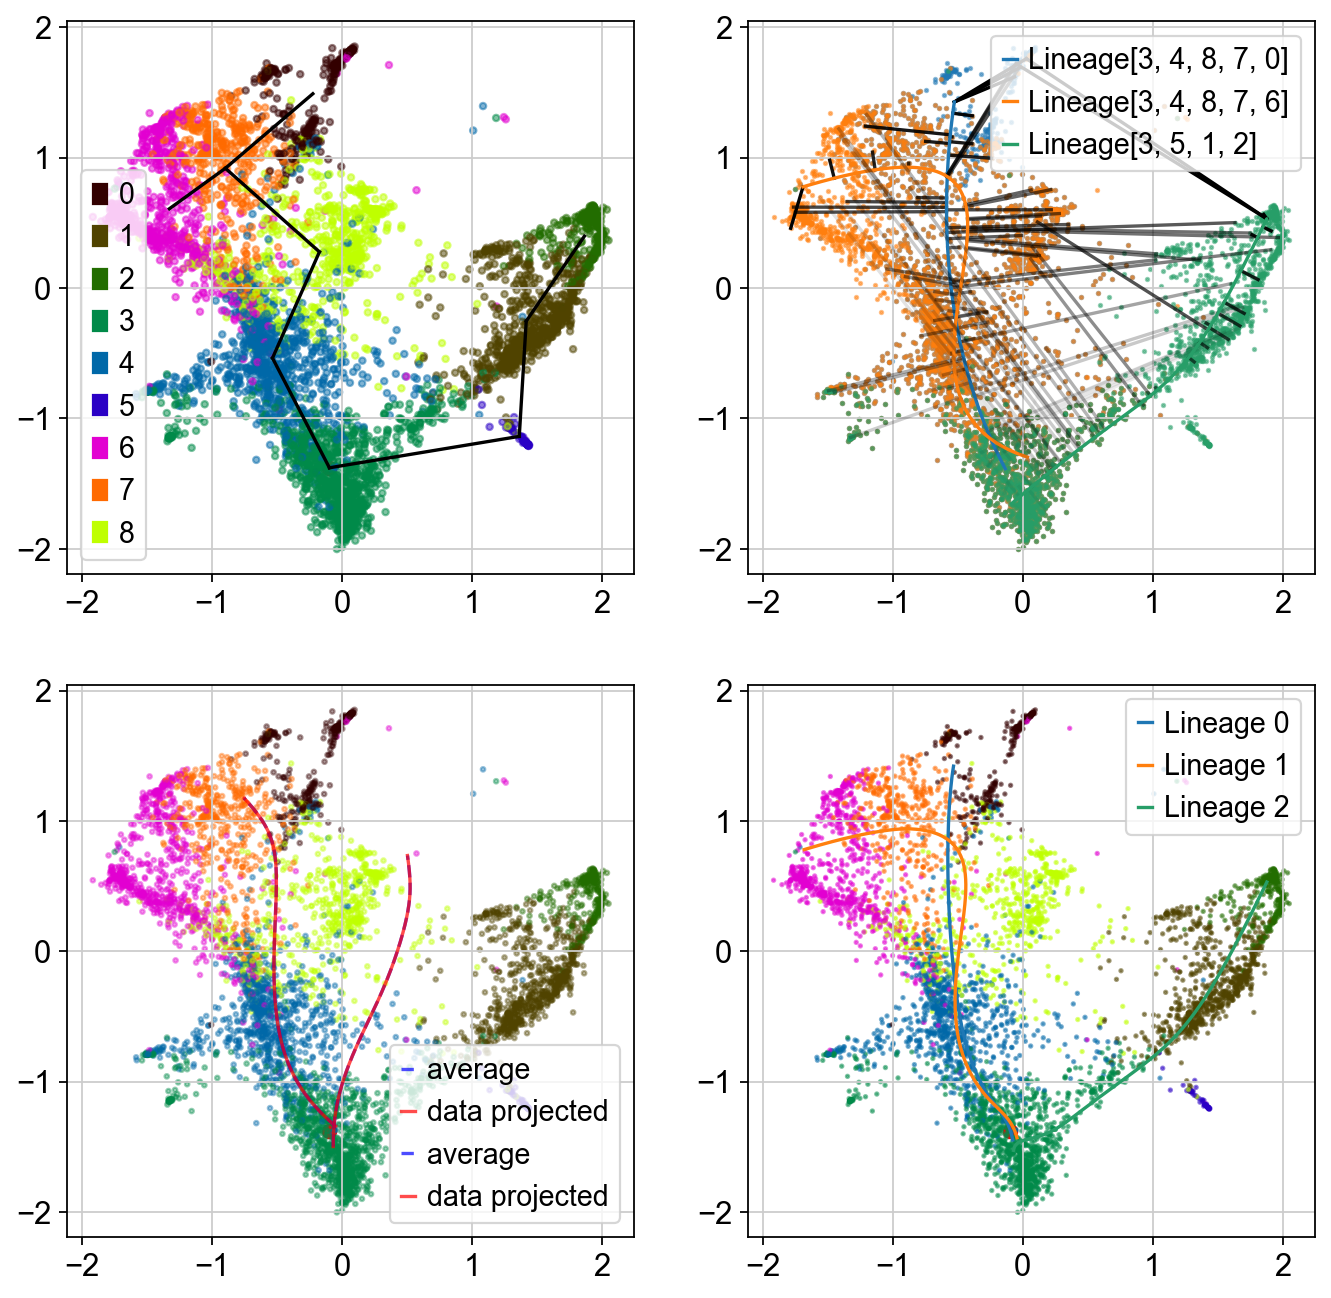

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
slingshot.fit(num_epochs=1, debug_axes=axes)

In [31]:
pseudotime = slingshot.unified_pseudotime

In [32]:
adata.obs['slingshot_time']=pseudotime

## evaluation

In [33]:
adata1=sc.read('../LTNN/data/Bone-ltnn.h5ad',compression='gzip')
adata1

AnnData object with n_obs × n_vars = 5275 × 3000
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name', 'palantir_entropy', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'latent_time_scvelo', 'velocity_pseudotime_scvelo', 'latent_time_velovi', 'velocity_pseudotime_velovi', 'pt_via', 'pt_via_noroot', 'pt_via_root', 'slingshot_time'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_

In [85]:
adata1.obs=adata.obs.copy()

In [88]:
scv.tl.paga(adata1, groups='clusters',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [93]:
trans_pd=pd.DataFrame(adata1.uns['paga']['transitions_confidence'].toarray(),
            index=adata1.obs['clusters'].cat.categories,
            columns=adata1.obs['clusters'].cat.categories,).T
trans_pd

HSC_1     HSC_2  Precursors    Mono_1    Mono_2  Mega       DCs  \
HSC_1         0.0  0.113399    0.000000  0.000000  0.000000   0.0  0.000000   
HSC_2         0.0  0.000000    0.046141  0.000000  0.000000   0.0  0.000000   
Precursors    0.0  0.000000    0.000000  0.014421  0.030003   0.0  0.000000   
Mono_1        0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   
Mono_2        0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.045594   
Mega          0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   
DCs           0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   
Ery_1         0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   
Ery_2         0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   

               Ery_1     Ery_2  
HSC_1       0.014956  0.000000  
HSC_2       0.000000  0.000000  
Precursors  0.000000  0.000000  
Mono_1      0.000000  0.000000  
Mono_2      0.000000  0.000000  
Mega        0.000000  0.000000  
DCs         0.000000  0.000000  
Ery_1       0.000000  0.080061  
Ery_2       0.000000  0.000000

In [98]:
stage1=trans_pd.loc['HSC_1','HSC_2']
stage2=trans_pd.loc['HSC_2','Precursors']
stage3=trans_pd.loc['Precursors','Mono_1']
stage4=trans_pd.loc['Precursors','Mono_2']
stage5=trans_pd.loc['HSC_1','Ery_1']
stage6=trans_pd.loc['Ery_1','Ery_2']
stage7=trans_pd.loc['HSC_1','Mega']
stage8=trans_pd.loc['Mono_2','DCs']

/mnt/home/zehuazeng/miniconda3/envs/omicverse/lib/python3.8/site-packages/networkx/convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


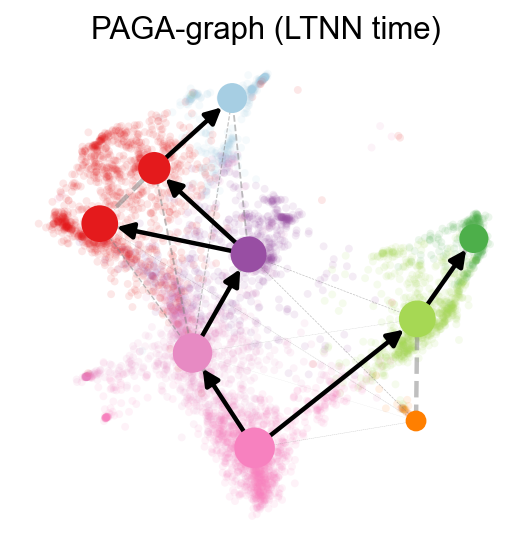

In [92]:
import scvelo as scv
ax=scv.pl.paga(adata1, basis='mde', size=50, alpha=.1,title='PAGA-graph (LTNN_time)',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

/mnt/home/zehuazeng/miniconda3/envs/omicverse/lib/python3.8/site-packages/omicverse/utils/_scatterplot.py:483: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(cax, orientation="vertical", cax=cax1)


<AxesSubplot: title={'center': 'slingshot_time'}, xlabel='X_mde1', ylabel='X_mde2'>

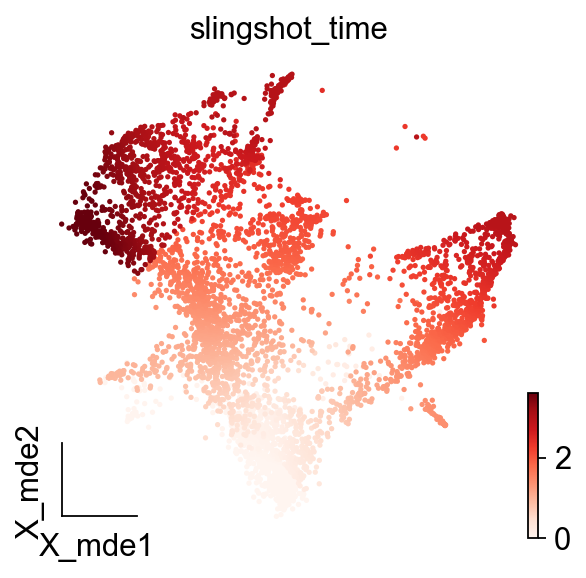

In [99]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(adata1,basis='X_mde', color=['slingshot_time'], 
               cmap='Reds',legend_loc='right margin',frameon='small',
                   ncols=2,wspace=0.4,show=False,ax=ax)

In [100]:
# 参数:
#   - adata:
#   - termination_ratio: 终末细胞比例，默认为 0.05。
#   - celltype_label: 表示细胞类型的标签。
#   - ground_truth_celttype: 真实细胞类型的列表。
#   - pseudotime: 表示伪时间值的标签。
# 返回:
#   - accuracy: 分类的准确性。

def accuracy_function(
    adata,
    termination_ratio=0.05,
    celltype_label='',
    ground_truth_celttype=[],
    pseudotime='',
):
    adata_obs = adata.obs
    # 根据给定的终末细胞比例计算终止百分位数
    percentile = adata_obs[pseudotime].quantile(1 - termination_ratio)
    # 选择具有伪时间值大于或等于计算百分位数的细胞
    adata_obs = adata_obs[adata_obs[pseudotime] >= percentile]
    # 根据真实细胞类型计算准确性
    accuracy = len(adata_obs.loc[adata_obs[celltype_label].isin(ground_truth_celttype), :]) / len(adata_obs)
    
    return accuracy

In [101]:
acc_dict={}
for method in ['pt_via_noroot','pt_via_root','slingshot_time',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'palantir_pseudotime','dpt_pseudotime','LTNN_time']:
    acc=accuracy_function(adata1,celltype_label='clusters',
                          termination_ratio=0.05,
                     ground_truth_celttype=['DCs','Mono_2','Ery_2'],
                     pseudotime=method)
    acc_dict[method]=acc
    print(method,acc)

pt_via_noroot 0.7094594594594594
pt_via_root 0.5880952380952381
slingshot_time 0.0
velocity_pseudotime_velovi 0.0
velocity_pseudotime_scvelo 0.0
latent_time_velovi 0.23106060606060605
latent_time_scvelo 0.9090909090909091
palantir_pseudotime 0.8787878787878788
dpt_pseudotime 0.8371212121212122
LTNN_time 0.9696969696969697


In [103]:
trans_dict={}
for method in ['pt_via_noroot','pt_via_root','slingshot_time',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'palantir_pseudotime','dpt_pseudotime','LTNN_time']:
    scv.tl.paga(adata1, groups='clusters',vkey='paga',use_time_prior=method)
    trans_pd=pd.DataFrame(adata1.uns['paga']['transitions_confidence'].toarray(),
                index=adata1.obs['clusters'].cat.categories,
                columns=adata1.obs['clusters'].cat.categories,).T
    #s_li=[]
    stage1=trans_pd.loc['HSC_1','HSC_2']
    stage2=trans_pd.loc['HSC_2','Precursors']
    stage3=trans_pd.loc['Precursors','Mono_1']
    stage4=trans_pd.loc['Precursors','Mono_2']
    stage5=trans_pd.loc['HSC_1','Ery_1']
    stage6=trans_pd.loc['Ery_1','Ery_2']
    stage7=trans_pd.loc['HSC_1','Mega']
    stage8=trans_pd.loc['Mono_2','DCs']
    s_li=[stage1,stage2,stage3,stage4,stage5,stage6,stage7,stage8]
    trans_dict[method]=s_li

running PAGA using priors: ['pt_via_noroot']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['pt_via_root']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['slingshot_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['velocity_pseudotime_velovi']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/conne

In [104]:
#trans_dict={}
trans_zero={}
for method in ['pt_via_noroot','pt_via_root','slingshot_time',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'palantir_pseudotime','dpt_pseudotime','LTNN_time']:
    print(method,np.mean(trans_dict[method]))
    ar=np.array(trans_dict[method])
    print(method,1-len(ar[ar==0])/len(ar))
    trans_zero[method]=1-len(ar[ar==0])/len(ar)

pt_via_noroot 0.024852864211141825
pt_via_noroot 0.625
pt_via_root 0.012916781474952253
pt_via_root 0.375
slingshot_time 0.05995190445177469
slingshot_time 0.75
velocity_pseudotime_velovi 0.0
velocity_pseudotime_velovi 0.0
velocity_pseudotime_scvelo 0.01191297977604
velocity_pseudotime_scvelo 0.25
latent_time_velovi 0.012205660634206042
latent_time_velovi 0.25
latent_time_scvelo 0.018339725401561105
latent_time_scvelo 0.25
palantir_pseudotime 0.04716320578801262
palantir_pseudotime 0.625
dpt_pseudotime 0.03644075249977114
dpt_pseudotime 0.625
LTNN_time 0.043071831558407464
LTNN_time 0.875


In [6]:
name_dict=dict(zip(['pt_via_noroot','pt_via_root','slingshot_time',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'palantir_pseudotime','dpt_pseudotime','LTNN_time'],
                  ['VIA(autoroot)','VIA(manualroot)','Slingshot(manualroot)',
              'VeloVI(autoroot)','scVelo(autoroot)',
               'VeloVI:Latent(autoroot)','scVelo:Latent(autoroot)',
              'Palantir(manualroot)','DPT(manualroot)','LTNN(autoroot)']))

In [106]:
plot_data1=pd.DataFrame(columns=['values','method'])
for method in ['pt_via_root','slingshot_time','palantir_pseudotime','dpt_pseudotime',
               'pt_via_noroot',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'LTNN_time']:
    plot_data_test=pd.DataFrame()
    plot_data_test['values']=np.array(trans_dict[method])
    plot_data_test['method']=name_dict[method]
    plot_data1=pd.concat([plot_data1,plot_data_test])
plot_data1.head() 

values           method
0  0.000000  VIA(manualroot)
1  0.058500  VIA(manualroot)
2  0.000000  VIA(manualroot)
3  0.000000  VIA(manualroot)
4  0.012598  VIA(manualroot)

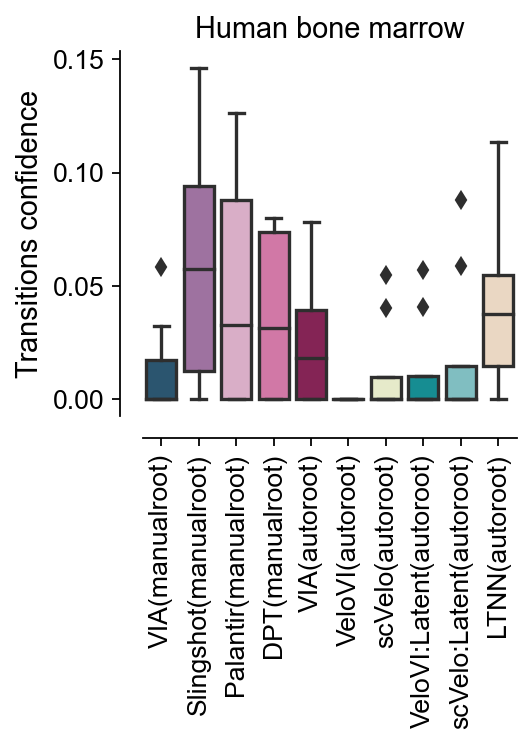

In [107]:
import seaborn as sns
fontsize=12
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(data=plot_data1,x='method',y='values',ax=ax,
           palette=ov.pl.sc_color[11:])


ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_ylabel('Transitions confidence',fontsize=fontsize+1)
ax.set_xlabel('',fontsize=fontsize+1)

#设置横纵坐标轴字体
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.grid(False)

#不显示右边跟上边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(rotation=90)
plt.title('Human bone marrow',fontsize=fontsize+1)

plt.savefig("figures/fig4/box_trans_human.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig4/box_trans_human.pdf",dpi=300,bbox_inches = 'tight')

In [108]:
plot_data1=pd.DataFrame(columns=['values','method'])
for method in ['pt_via_root','slingshot_time','palantir_pseudotime','dpt_pseudotime',
               'pt_via_noroot',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'LTNN_time']:
    plot_data_test=pd.DataFrame()
    plot_data_test['values']=np.array([trans_zero[method]])
    plot_data_test['method']=name_dict[method]
    plot_data1=pd.concat([plot_data1,plot_data_test])
plot_data1.head() 

values                 method
0   0.375        VIA(manualroot)
0   0.750  Slingshot(manualroot)
0   0.625   Palantir(manualroot)
0   0.625        DPT(manualroot)
0   0.625          VIA(autoroot)

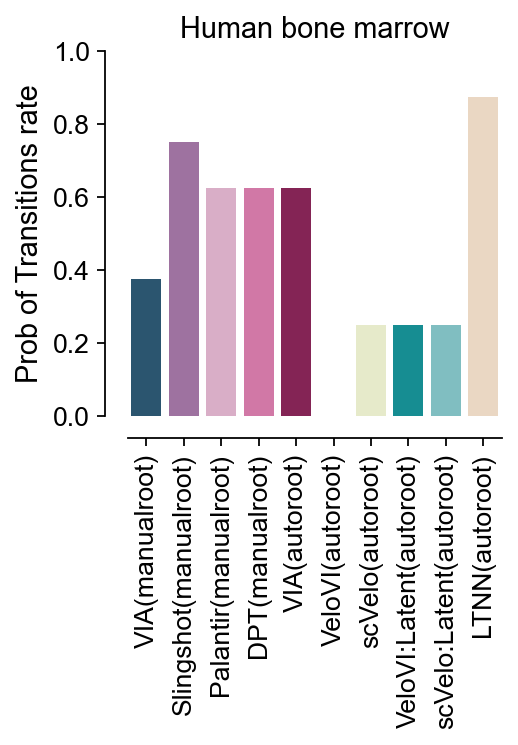

In [109]:
import seaborn as sns
fontsize=12
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(data=plot_data1,x='method',y='values',ax=ax,
           palette=ov.pl.sc_color[11:])


ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_ylabel('Prob of Transitions rate',fontsize=fontsize+1)
ax.set_xlabel('',fontsize=fontsize+1)

#设置横纵坐标轴字体
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.grid(False)
plt.ylim(0,1)

#不显示右边跟上边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(rotation=90)
plt.title('Human bone marrow',fontsize=fontsize+1)

plt.savefig("figures/fig4/bar_rate_human.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig4/bar_rate_human.pdf",dpi=300,bbox_inches = 'tight')

In [110]:
plot_data1=pd.DataFrame(columns=['values','method'])
for method in ['pt_via_root','slingshot_time','palantir_pseudotime','dpt_pseudotime',
               'pt_via_noroot',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'LTNN_time']:
    plot_data_test=pd.DataFrame()
    plot_data_test['values']=np.array([acc_dict[method]])
    plot_data_test['method']=name_dict[method]
    plot_data1=pd.concat([plot_data1,plot_data_test])
plot_data1.head() 

values                 method
0  0.588095        VIA(manualroot)
0  0.000000  Slingshot(manualroot)
0  0.878788   Palantir(manualroot)
0  0.837121        DPT(manualroot)
0  0.709459          VIA(autoroot)

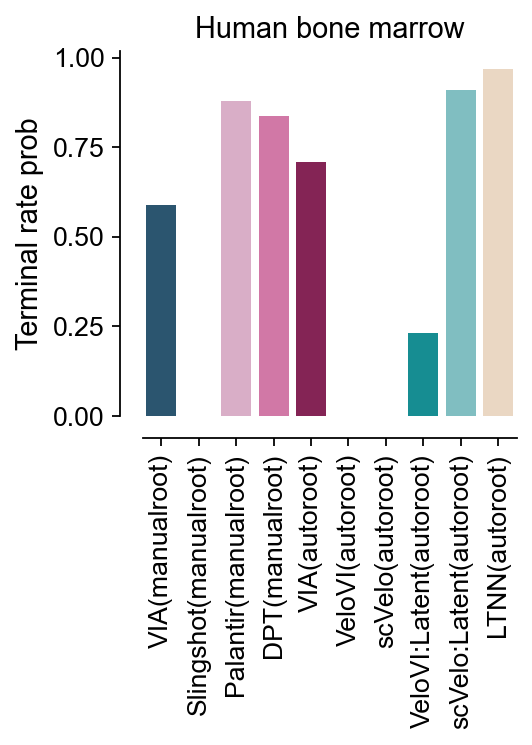

In [112]:
import seaborn as sns
fontsize=12
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(data=plot_data1,x='method',y='values',ax=ax,
           palette=ov.pl.sc_color[11:])


ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_ylabel('Terminal rate prob',fontsize=fontsize+1)
ax.set_xlabel('',fontsize=fontsize+1)

#设置横纵坐标轴字体
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.grid(False)
#plt.ylim(0.9,1)

#不显示右边跟上边
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(rotation=90)
plt.title('Human bone marrow',fontsize=fontsize+1)

plt.savefig("figures/fig4/bar_terminal_human.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig4/bar_terminal_human.pdf",dpi=300,bbox_inches = 'tight')

In [113]:
adata1.write('data/human_time.h5ad',compression='gzip')

## Nbt metric

In [3]:
adata=sc.read('data/human_time.h5ad',compression='gzip')
adata

AnnData object with n_obs × n_vars = 5275 × 3000
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name', 'palantir_entropy', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'latent_time_scvelo', 'velocity_pseudotime_scvelo', 'latent_time_velovi', 'velocity_pseudotime_velovi', 'pt_via', 'pt_via_noroot', 'pt_via_root', 'slingshot_time'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'T_fwd_params', 'clusters_colors', 'clusters_sizes', 'diffmap_evals', 'hvg', 'iroot', 'leiden', 'leiden_colors', 'leiden_siz

In [4]:
import scvelo as scv
scv.tl.paga(adata, groups='clusters',vkey='paga',use_time_prior='LTNN_time')

Global seed set to 0


running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


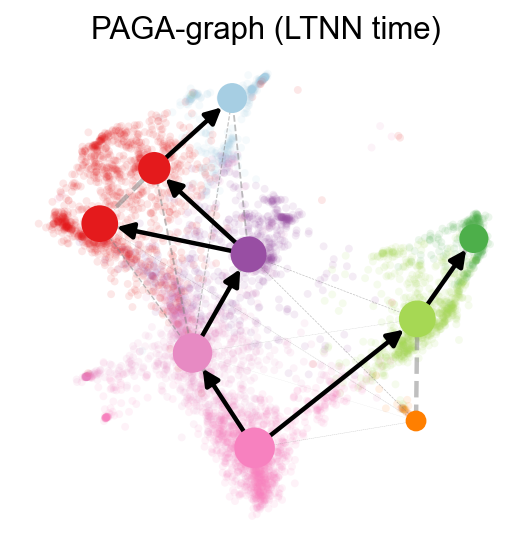

In [5]:
import scvelo as scv
ax=scv.pl.paga(adata, basis='mde', size=50, alpha=.1,title='PAGA-graph (LTNN_time)',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

running PAGA using priors: ['pt_via_root']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['slingshot_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['palantir_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
running PAGA using priors: ['dpt_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivit

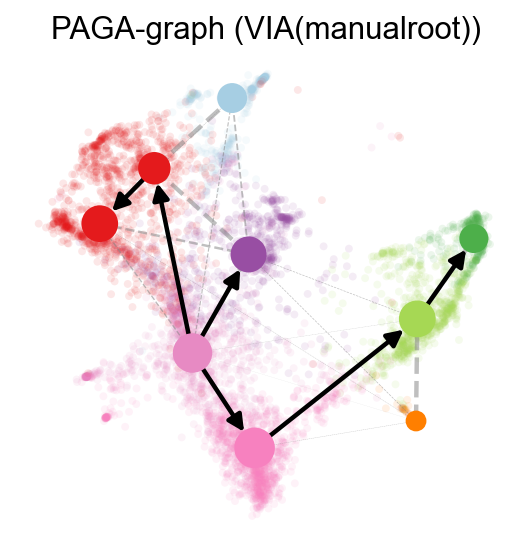

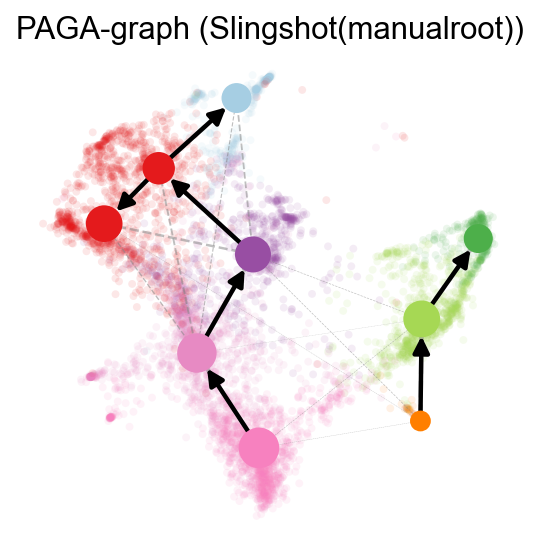

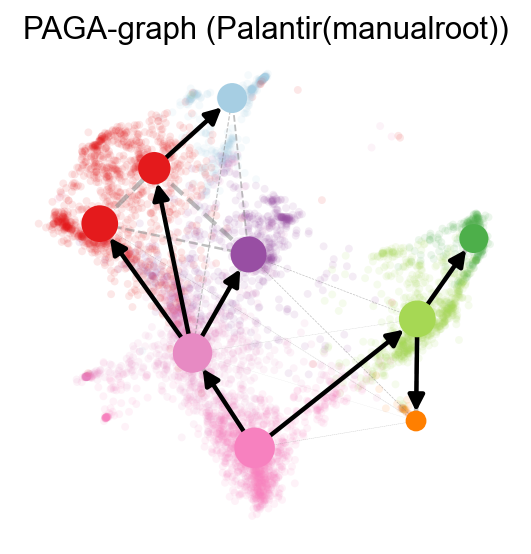

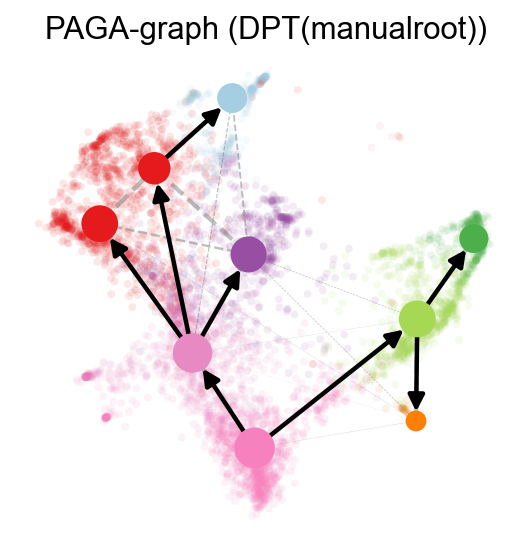

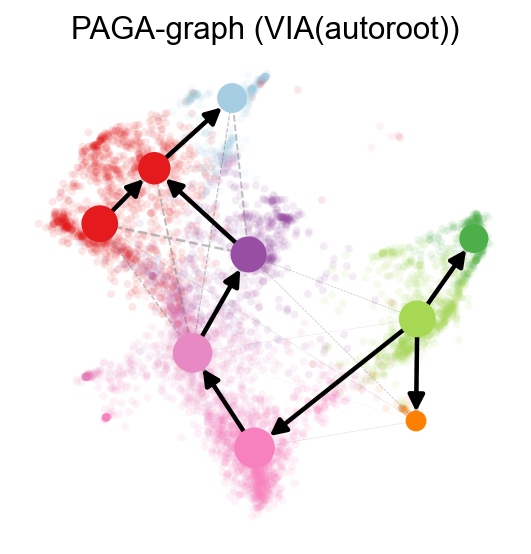

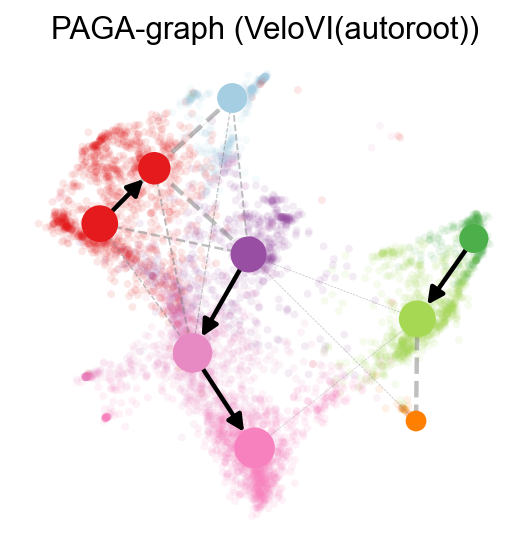

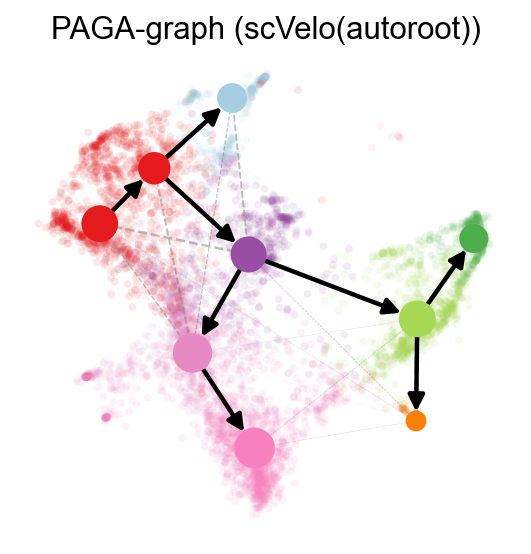

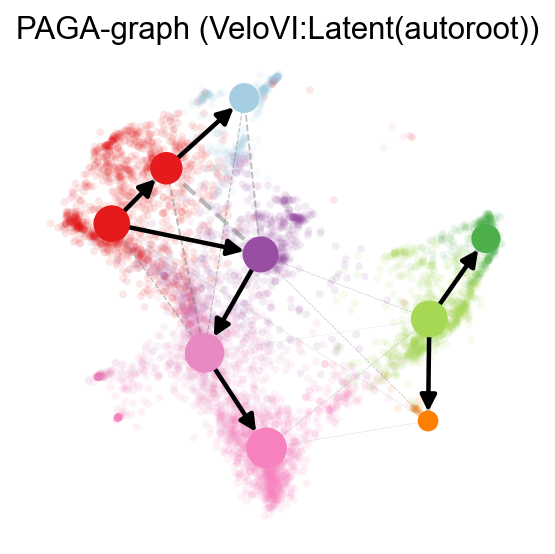

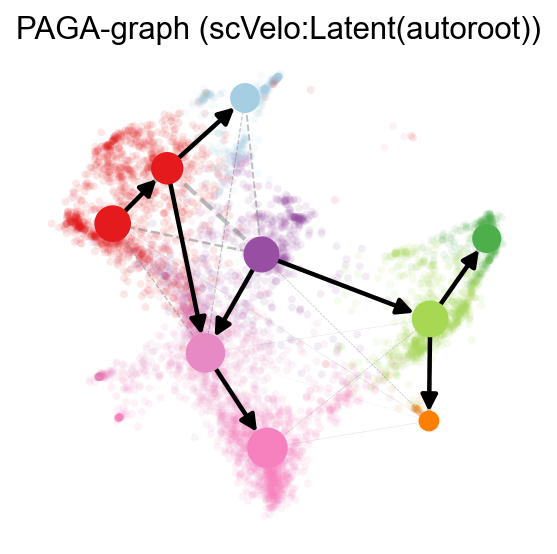

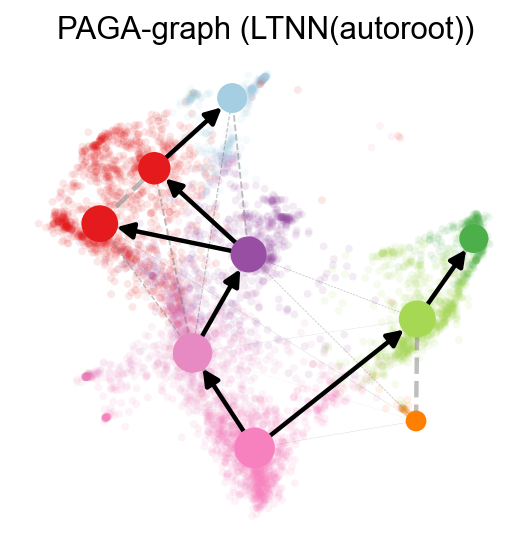

In [8]:
for method in ['pt_via_root','slingshot_time','palantir_pseudotime','dpt_pseudotime',
               'pt_via_noroot',
              'velocity_pseudotime_velovi','velocity_pseudotime_scvelo',
               'latent_time_velovi','latent_time_scvelo',
              'LTNN_time']:
    scv.tl.paga(adata, groups='clusters',vkey='paga',use_time_prior=method)
    ax=scv.pl.paga(adata, basis='mde', size=50, alpha=.1,title=f'PAGA-graph ({name_dict[method]})',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
    plt.savefig(f"figures/fig4/PAGA-graph ({name_dict[method]}).png",dpi=300,bbox_inches = 'tight')
    plt.savefig(f"pdf/fig4/PAGA-graph ({name_dict[method]}).pdf",dpi=300,bbox_inches = 'tight')

In [44]:
trans_pd=pd.DataFrame(adata.uns['paga']['transitions_confidence'].toarray(),
            index=adata.obs['clusters'].cat.categories,
            columns=adata.obs['clusters'].cat.categories,).T
trans_pd

HSC_1     HSC_2  Precursors    Mono_1    Mono_2  Mega       DCs  \
HSC_1         0.0  0.113399    0.000000  0.000000  0.000000   0.0  0.000000   
HSC_2         0.0  0.000000    0.046141  0.000000  0.000000   0.0  0.000000   
Precursors    0.0  0.000000    0.000000  0.014421  0.030003   0.0  0.000000   
Mono_1        0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   
Mono_2        0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.045594   
Mega          0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   
DCs           0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   
Ery_1         0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   
Ery_2         0.0  0.000000    0.000000  0.000000  0.000000   0.0  0.000000   

               Ery_1     Ery_2  
HSC_1       0.014956  0.000000  
HSC_2       0.000000  0.000000  
Precursors  0.000000  0.000000  
Mono_1      0.000000  0.000000  
Mono_2      0.000000  0.000000  
Mega        0.000000  0.000000  
DCs         0.000000  0.000000  
Ery_1       0.000000  0.080061  
Ery_2       0.000000  0.000000

In [45]:
import networkx as nx
G = nx.from_pandas_adjacency(trans_pd,create_using=nx.DiGraph)

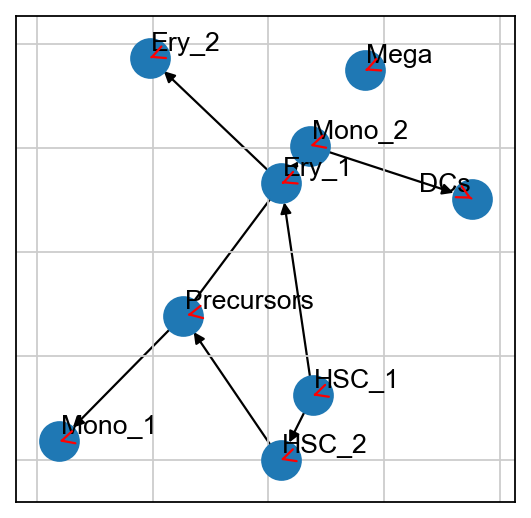

In [26]:
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(
    G,
    pos,
)
from adjustText import adjust_text
import adjustText
texts=[plt.text(pos[i][0], 
           pos[i][1],
           i,
           fontdict={'size':12,'weight':'normal','color':'black'}
           ) for i in G.nodes]
if adjustText.__version__<='0.8':
    adjust_text(texts,only_move={'text': 'xy'},arrowprops=dict(arrowstyle='->', color='red'),)

In [27]:
trans_pd.index

Index(['HSC_1', 'HSC_2', 'Precursors', 'Mono_1', 'Mono_2', 'Mega', 'DCs',
       'Ery_1', 'Ery_2'],
      dtype='object')

In [28]:
G_ref=nx.DiGraph()
G_ref.add_edges_from([('HSC_1', 'HSC_2'),
                     ('HSC_2','Precursors'),
                     ('HSC_1','Mega'),
                     ('HSC_1','Ery_1'),
                     ('Ery_1','Ery_2'),
                     ('Precursors','Mono_1'),
                     ('Precursors','Mono_2'),
                     ('Precursors','DCs')])

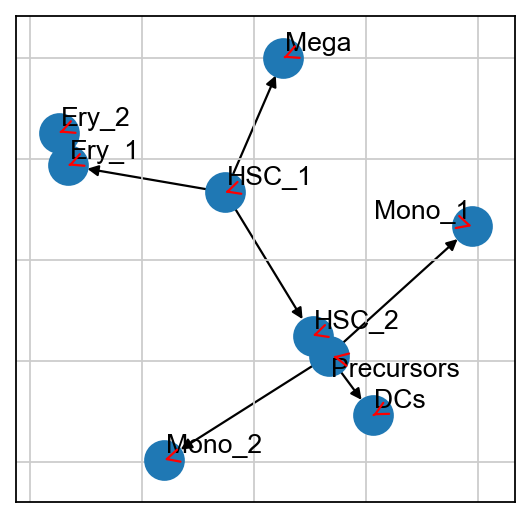

In [29]:
pos = nx.spring_layout(G_ref)
nx.draw_networkx_edges(G_ref, pos)
nx.draw_networkx_nodes(
    G_ref,
    pos,
)
from adjustText import adjust_text
import adjustText
texts=[plt.text(pos[i][0], 
           pos[i][1],
           i,
           fontdict={'size':12,'weight':'normal','color':'black'}
           ) for i in G_ref.nodes]
if adjustText.__version__<='0.8':
    adjust_text(texts,only_move={'text': 'xy'},arrowprops=dict(arrowstyle='->', color='red'),)

In [46]:
import netrd
dist_obj = netrd.distance.JaccardDistance()
distance = dist_obj.dist(G, G_ref,)


In [47]:
distance

0.33333333333333337